<a href="https://colab.research.google.com/github/orcus69/INTELIGENCIA_ARTIFICIAL/blob/main/KMEANS_JOSUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

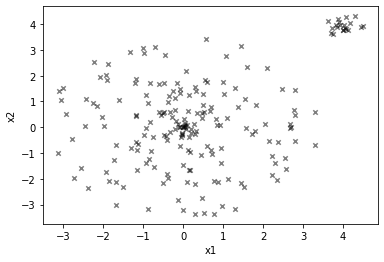

In [9]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
satellite = pd.read_csv(data_dir + "satellite.csv")

X_train = satellite[["x1", "x2"]]
X_train.plot.scatter(x="x1", y="x2", c="black", marker="x", alpha=.5)


,x1,x2
r,-1.683179,-0.677632
b,-0.976030,2.887041


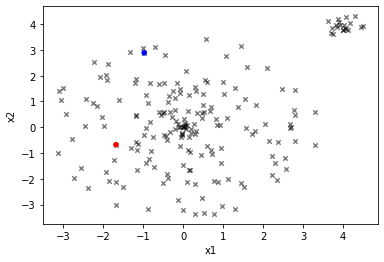

In [10]:
#INICIALIZA 2 CENTROIDES ALEATORIOS
centroids = X_train.sample(2)

centroids.index = ["r", "b"]

#PLOT OS CENTROIDES NO GRAFICO
ax = X_train.plot.scatter(x="x1", y="x2", 
                          c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="x1", y="x2", 
                       c=centroids.index, ax=ax)

centroids

In [11]:
# ENCONTRA O CENTROIDE MAIS PERTO.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train.loc[0])

clusters = X_train.apply(get_nearest_centroid, axis=1)

In [22]:
#TREINAMENTO
# CALCULA A DISTANTA PARA TODO PONTO
centroids = X_train.groupby(clusters).mean()

# ATRIBUI CADA PONTO AO SEU CENTROIDE MAIS PROXIMO
clusters = X_train.apply(get_nearest_centroid, axis=1)

# RECALCULA OS CENTROIDOS COM BASE NOS NOVOS CLUSTERS
centroids = X_train.groupby(clusters).mean()


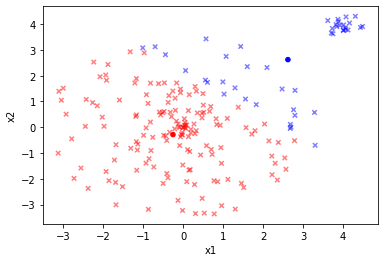

In [20]:
#PLOTA O GRAFICO COM OS GRUPOS
ax = X_train.plot.scatter(x="x1", y="x2", 
                          c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="x1", y="x2", 
                       c=centroids.index, ax=ax)